# Analysis of Results
{{text_file = open("experiment_details.txt")}}
{{file_content = text_file.read()}}
{{print(file_content)}}
{{text_file.close()}}

In [1]:
%matplotlib notebook

import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

files = glob.glob("output_folderDICe*.txt")
final_list = sorted(files)
all_displacements = []
z_displacements = []
y_displacements = []
x_displacements = []

print (len(final_list))

for file_name in final_list:
    data = pd.read_csv(file_name)
    all_displacements.append(data)
    z_displacements.append(data.MODEL_DISPLACEMENT_Z)
    y_displacements.append(data.MODEL_DISPLACEMENT_Y)
    x_displacements.append(data.MODEL_DISPLACEMENT_X)

print (len(data.MODEL_DISPLACEMENT_Z))

200
27


In [2]:
final_displacement = []
for file_name in final_list:
    data = pd.read_csv(file_name)
    final_displacement.append(data.MODEL_DISPLACEMENT_Z[26])
fin_disp_2d = np.reshape(final_displacement,(20,10))
fin_disp_2d = fin_disp_2d + (np.min(fin_disp_2d)*-1)
print(fin_disp_2d)

[[6.7183   3.3449   3.2484   3.2849   3.2172   3.1902   3.1615   3.0462
  2.7807   2.55    ]
 [6.7183   3.7817   3.7033   3.698    3.6507   3.6589   3.3616   3.3791
  3.0979   2.8245  ]
 [6.7183   4.0484   4.077    4.0892   4.1525   3.9912   7.03472  3.7896
  3.5292   3.1988  ]
 [6.7183   4.2799   4.41     4.4646   4.4685   4.4699   4.3353   6.645466
  3.8353   3.3919  ]
 [6.7183   4.4224   4.5556   4.79     4.8151   4.9647   5.89157  4.6839
  4.0824   3.5984  ]
 [6.5622   4.4336   4.6821   4.9822   5.1627   5.4489   6.32764  5.2012
  4.3956   3.8469  ]
 [6.61689  4.316    4.6055   4.9199   5.3138   5.6661   6.00646  5.4268
  4.6054   3.9622  ]
 [4.2506   4.1525   4.5209   4.8696   5.332    5.79176  6.08544  5.4619
  4.7827   4.0521  ]
 [4.0417   3.8216   4.2593   4.6732   5.1241   5.81847  6.08946  5.5467
  4.7061   4.0253  ]
 [3.1937   3.6109   4.003    4.4344   4.8886   5.5869   5.86248  5.3823
  4.6528   3.9501  ]
 [2.9188   3.2774   3.6574   3.9927   4.4661   5.0541   5.3043   4.9

(20, 10) (20, 10) (20, 10)


<IPython.core.display.Javascript object>


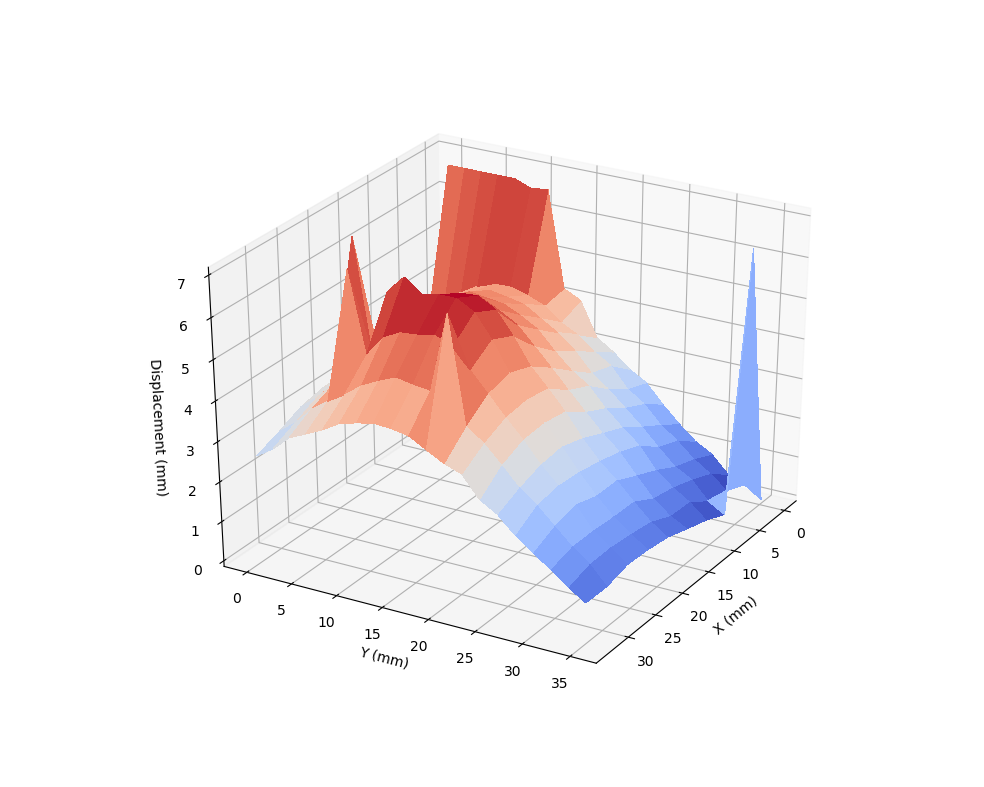

In [3]:
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]
X = np.arange(0, 37, 3.7)
Y = np.arange(0, 37, 1.85)
X, Y = np.meshgrid(X, Y)
Z = fin_disp_2d
print (X.shape, Y.shape, Z.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.azim = 30
ax.elev = 30
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()
plt.savefig("3d_plot.png")

In [4]:
for ridx,row in enumerate(fin_disp_2d):
    last_value = 0
    for cidx,item in enumerate(row):
        old_item = item
        if last_value != 0:            
            if (item-last_value > 1):
                fin_disp_2d[ridx][cidx] = last_value
        last_value = item

(20, 10) (20, 10) (20, 10)


<IPython.core.display.Javascript object>


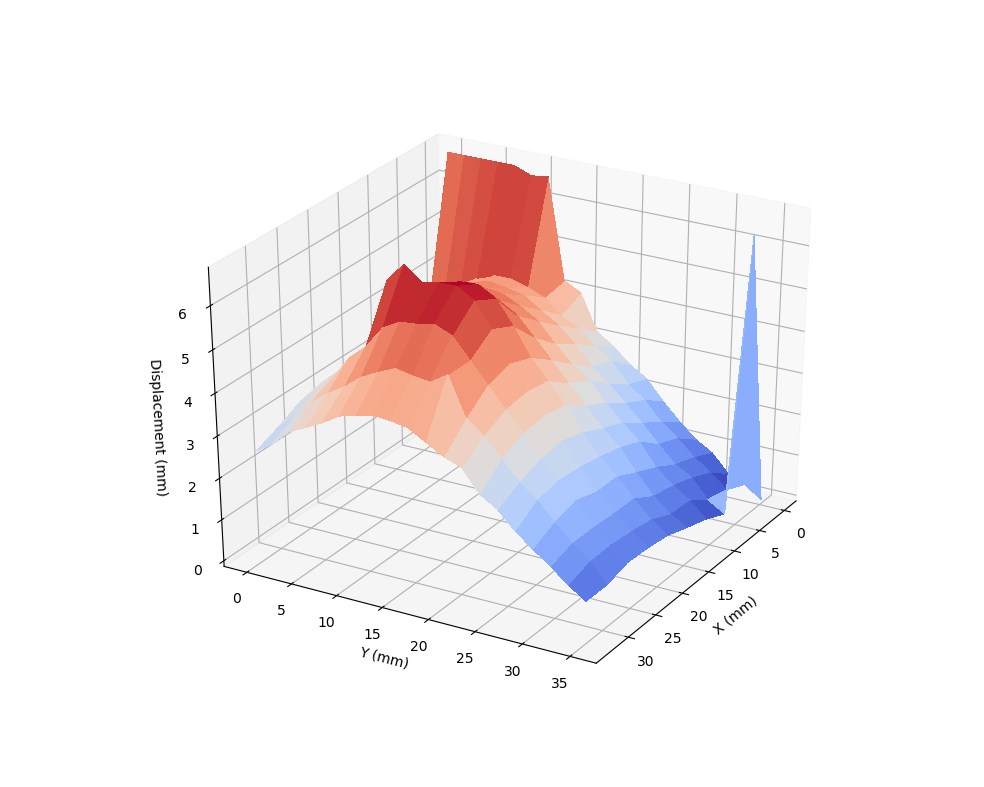

In [5]:
X = np.arange(0, 37, 3.7)
Y = np.arange(0, 37, 1.85)
X, Y = np.meshgrid(X, Y)
Z = fin_disp_2d
print (X.shape, Y.shape, Z.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.azim = 30
ax.elev = 30
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

(20, 10) (20, 10) (20, 10)


<IPython.core.display.Javascript object>


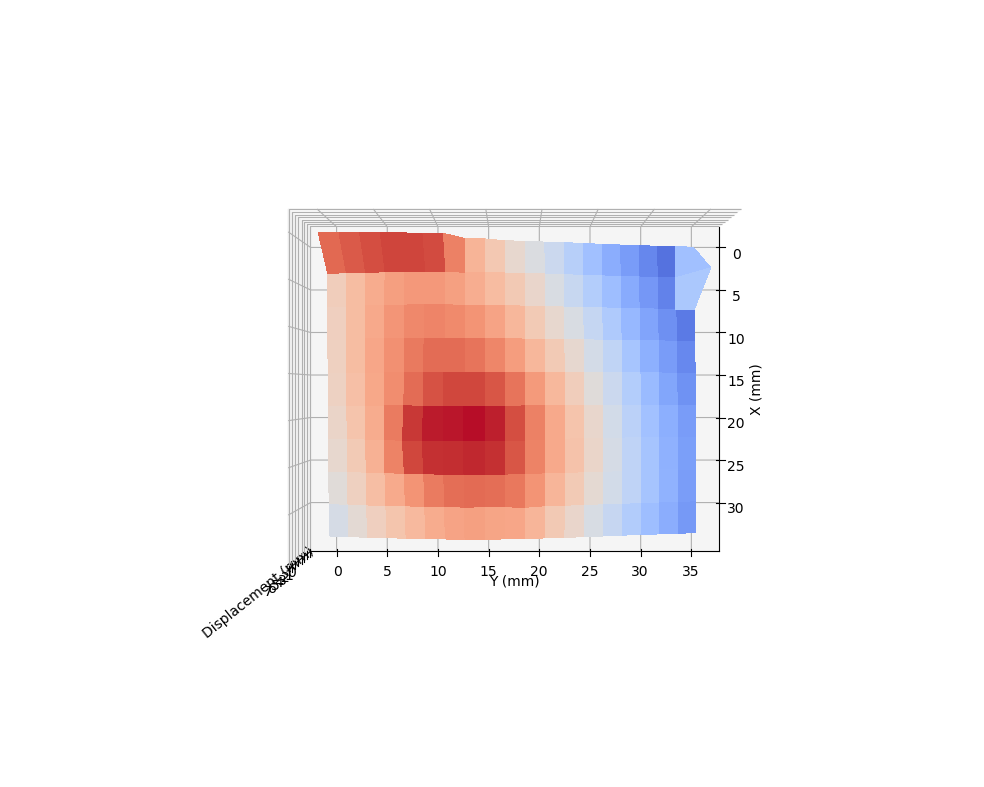

In [6]:
final_displacement = []
for file_name in final_list:
    data = pd.read_csv(file_name)
    final_displacement.append(data.MODEL_DISPLACEMENT_Z[26])
fin_disp_2d = np.reshape(final_displacement,(20,10))
fin_disp_2d = fin_disp_2d + (np.min(fin_disp_2d)*-1)

for ridx,row in enumerate(fin_disp_2d):
    last_value = 0
    for cidx,item in enumerate(row):
        old_item = item
        if last_value != 0:            
            if (item-last_value > 1):
                fin_disp_2d[ridx][cidx] = last_value
        last_value = item

X = np.arange(0, 37, 3.7)
Y = np.arange(0, 37, 1.85)
X, Y = np.meshgrid(X, Y)
Z = fin_disp_2d
print (X.shape, Y.shape, Z.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlim(0,7)
ax.azim = 0
ax.elev = 90
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False,vmax=6., vmin=0.)
plt.show()
plt.savefig("3d_plot.png")

In [7]:
filtered_displacement = []
filtered_displacement = np.empty(fin_disp_2d.shape, float)

for ridx,row in enumerate(fin_disp_2d):
    for cidx,item in enumerate(row):
        if cidx>=(len(row)-1):
            new_value = (fin_disp_2d[ridx][cidx])
        elif cidx>=(len(row)-2):
            new_value = (fin_disp_2d[ridx][cidx]+fin_disp_2d[ridx][cidx+1])/2
        elif cidx>=(len(row)-3):
            new_value = (fin_disp_2d[ridx][cidx]+fin_disp_2d[ridx][cidx+1]+fin_disp_2d[ridx][cidx+2])/3
        elif cidx>=(len(row)-4):
            new_value = (fin_disp_2d[ridx][cidx]+fin_disp_2d[ridx][cidx+1]+fin_disp_2d[ridx][cidx+2]+fin_disp_2d[ridx][cidx+3])/4
        else:            
            new_value = (fin_disp_2d[ridx][cidx]+fin_disp_2d[ridx][cidx+1]+fin_disp_2d[ridx][cidx+2]+fin_disp_2d[ridx][cidx+3]+fin_disp_2d[ridx][cidx+4])/5
        filtered_displacement[ridx][cidx]=new_value

(20, 10) (20, 10) (20, 10)


<IPython.core.display.Javascript object>


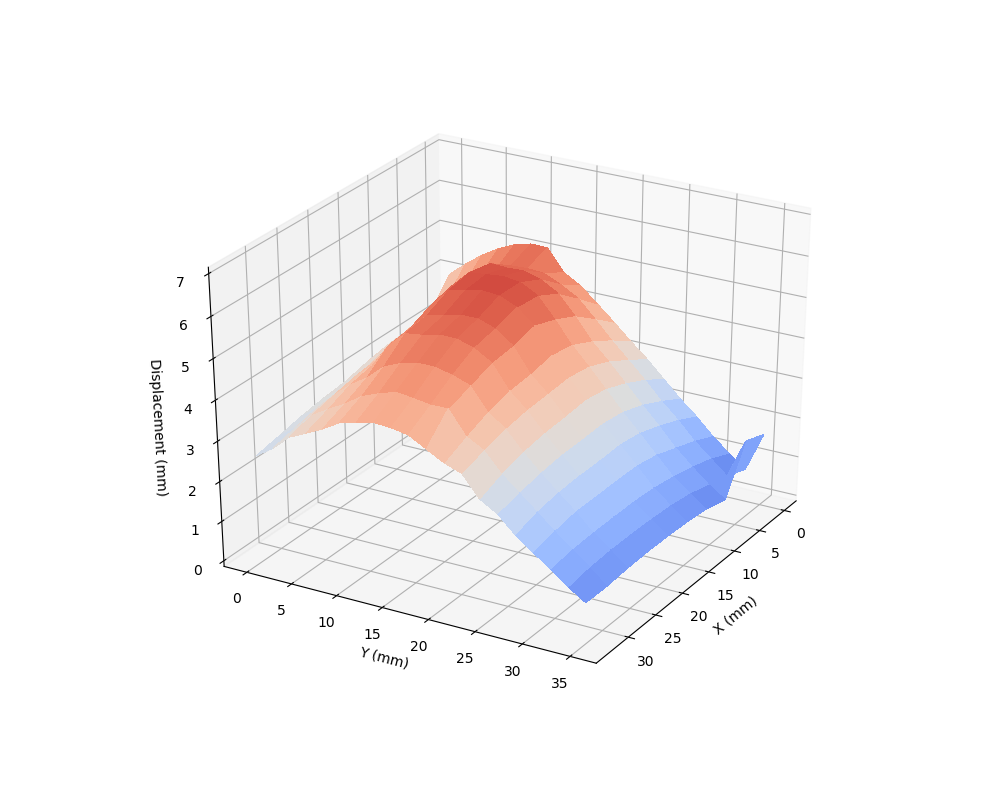

In [8]:
X = np.arange(0, 37, 3.7)
Y = np.arange(0, 37, 1.85)
X, Y = np.meshgrid(X, Y)
Z = filtered_displacement
print (X.shape, Y.shape, Z.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlim(0,7)
ax.azim = 30
ax.elev = 30
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False,vmax=6., vmin=0.)
plt.show()
plt.savefig("3d_plot.png")

<IPython.core.display.Javascript object>


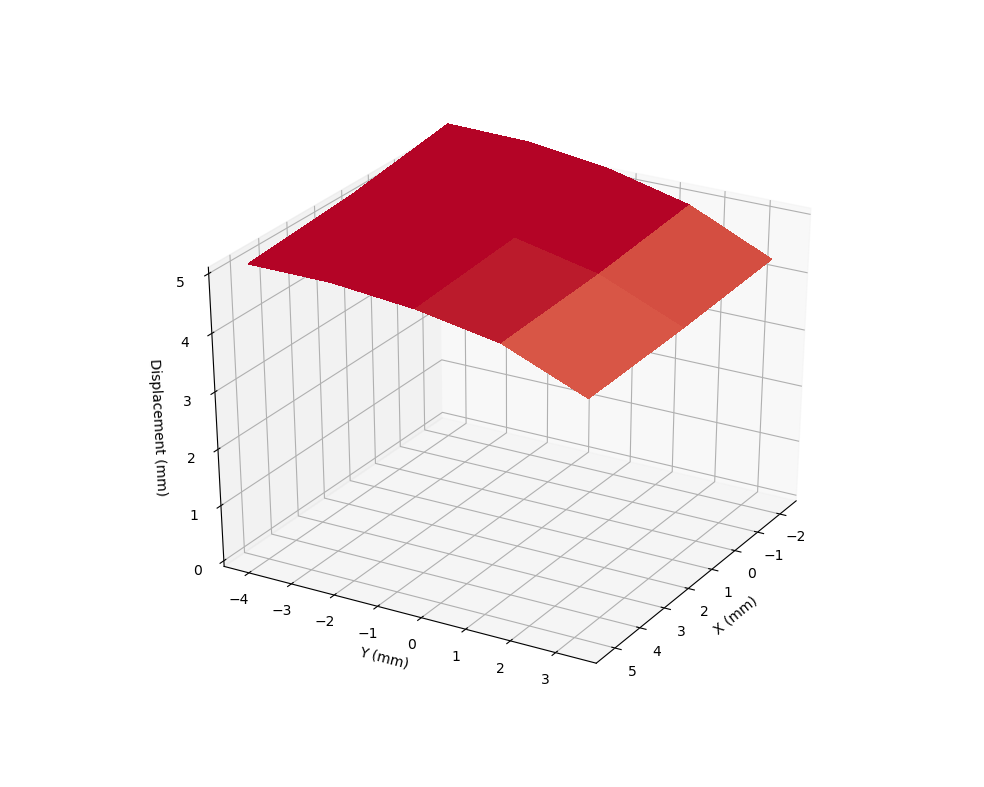

(5, 3) (5, 3) (5, 3)


In [9]:
X = np.arange(-17, 18, 3.7)
Y = np.arange(-17, 18, 1.85)
X, Y = np.meshgrid(X, Y)

#7:11 gives us radius 10
#7:12 gives us radius 15
Xsubsample = X[7:12,4:7]
Ysubsample = Y[7:12,4:7]
Zsubsample = Z[7:12,4:7]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlim(0,5)
ax.azim = 30
ax.elev = 30
surf = ax.plot_surface(Xsubsample, Ysubsample, Zsubsample, cmap=cm.coolwarm, linewidth=0, antialiased=False,vmax=5., vmin=0.)
print (Xsubsample.shape, Ysubsample.shape, Zsubsample.shape)
size_flat = Xsubsample.shape[0]*Xsubsample.shape[1]
plt.show()
plt.savefig("radius_extr.png")

(15,)
(15,)
(15,)
[15.50121053] [0.91247837] [-2.40238402] [-9.88632412]


C:\Users\kydh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


<IPython.core.display.Javascript object>


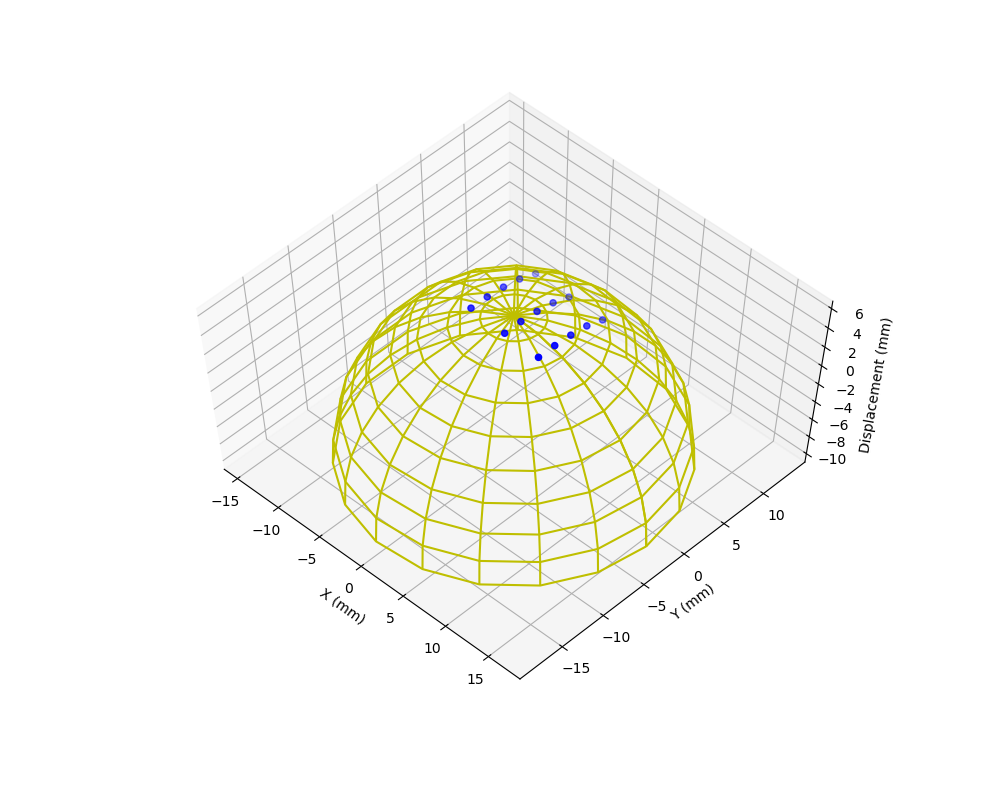

In [10]:
Xflat = np.reshape(Xsubsample,(size_flat,))
Yflat = np.reshape(Ysubsample,(size_flat,))
Zflat = np.reshape(Zsubsample,(size_flat,))
#   Assemble the A matrix
spX = np.array(Xflat)
spY = np.array(Yflat)
spZ = np.array(Zflat)
A = np.zeros((len(spX),4))
print (spX.shape)
print (spY.shape)
print (spZ.shape)
A[:,0] = spX*2
A[:,1] = spY*2
A[:,2] = spZ*2
A[:,3] = 1

#   Assemble the f matrix
f = np.zeros((len(spX),1))
f[:,0] = (spX*spX) + (spY*spY) + (spZ*spZ)
C, residules, rank, singval = np.linalg.lstsq(A,f)

#   solve for the radius
t = (C[0]*C[0])+(C[1]*C[1])+(C[2]*C[2])+C[3]
radius = np.sqrt(t)
r=radius
x0 = C[0]
y0 = C[1]
z0 = C[2] 

print(radius, C[0], C[1], C[2])
u, v = np.mgrid[0:2*np.pi:20j, 0:0.5*np.pi:10j]
x=np.cos(u)*np.sin(v)*r
y=np.sin(u)*np.sin(v)*r
z=np.cos(v)*r
x = x + x0
y = y + y0
z = z + z0

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xflat, Yflat, Zflat, zdir='z', s=20, c='b',rasterized=True)
ax.plot_wireframe(x, y, z, color="y")
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.azim = -46
ax.elev = 62

plt.show()
plt.savefig("radius_est.png")

In [11]:
filtered_displacement = []
filtered_displacement = np.empty(fin_disp_2d.shape, float)

for ridx,row in enumerate(fin_disp_2d):
    for cidx,item in enumerate(row):
        if cidx>=(len(row)-1):
            average = (fin_disp_2d[ridx][cidx])
        elif cidx>=(len(row)-2):
            average = (fin_disp_2d[ridx][cidx]+fin_disp_2d[ridx][cidx+1])/2
        elif cidx>=(len(row)-3):
            average = (fin_disp_2d[ridx][cidx]+fin_disp_2d[ridx][cidx+1]+fin_disp_2d[ridx][cidx+2])/3
        elif cidx>=(len(row)-4):
            average = (fin_disp_2d[ridx][cidx]+fin_disp_2d[ridx][cidx+1]+fin_disp_2d[ridx][cidx+2]+fin_disp_2d[ridx][cidx+3])/4
        else:            
            average = (fin_disp_2d[ridx][cidx]+fin_disp_2d[ridx][cidx+1]+fin_disp_2d[ridx][cidx+2]+fin_disp_2d[ridx][cidx+3]+fin_disp_2d[ridx][cidx+4])/5
        if abs(fin_disp_2d[ridx][cidx]-average)>2:
            filtered_displacement[ridx][cidx]=average
        filtered_displacement[ridx][cidx]=fin_disp_2d[ridx][cidx]

(20, 10) (20, 10) (20, 10)


<IPython.core.display.Javascript object>


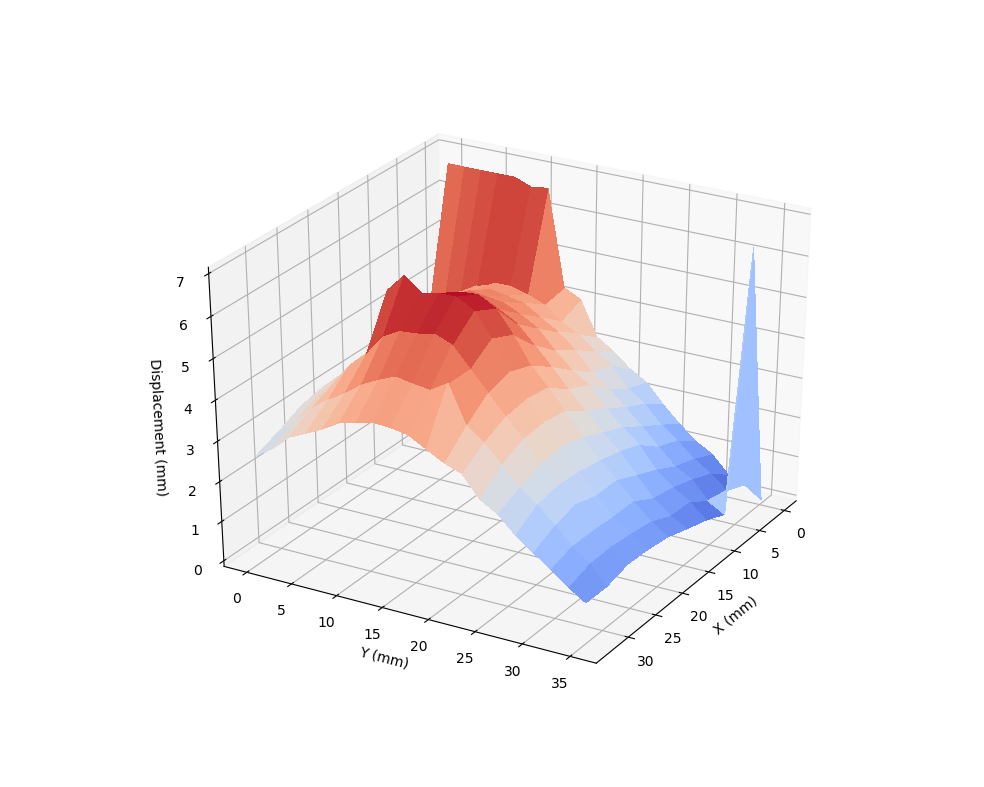

In [12]:
X = np.arange(0, 37, 3.7)
Y = np.arange(0, 37, 1.85)
X, Y = np.meshgrid(X, Y)
Z = filtered_displacement
print (X.shape, Y.shape, Z.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlabel("Displacement (mm)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlim(0,7)
ax.azim = 30
ax.elev = 30
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False,vmax=6., vmin=0.)
plt.show()
plt.savefig("3d_plot.png")